Task 3: Customer Segmentation / Clustering

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv((r"C:\Users\sachu\Downloads\OneDrive\Customers.csv"))
products = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Products.csv")
transactions = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Transactions.csv")

# Merge the two datasets (assuming common column 'Customer ID')
data = pd.merge(customers, transactions, on='CustomerID')

# Data Preprocessing: Handle missing values, remove outliers, etc.
# For example:
data.fillna(data.mean(), inplace=True)

# Feature Engineering: Select relevant features (customer profile and transaction info)
# Assuming the columns include 'Age', 'Gender', 'Total Spending', 'Transaction Frequency', etc.
features = data[['Age', 'Total Spending', 'Transaction Frequency']]  # Example features

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method for optimal k value (Number of clusters)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal k (e.g., based on elbow curve, or trial)
optimal_k = 4

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# DB Index Calculation
db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualization using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (Clusters) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# You can also include other clustering metrics like Silhouette Score or analyze the cluster profiles



TypeError: Could not convert ['C0118C0118C0118C0118C0118C0118C0079C0079C0079C0079C0104C0104C0104C0104C0104C0104C0104C0104C0002C0002C0002C0002C0166C0166C0166C0166C0134C0134C0134C0134C0134C0045C0045C0045C0045C0045C0045C0045C0198C0198C0023C0023C0023C0023C0023C0023C0040C0040C0040C0139C0139C0139C0139C0139C0139C0139C0139C0161C0161C0161C0161C0161C0161C0161C0161C0070C0070C0070C0070C0153C0153C0153C0153C0153C0153C0176C0176C0176C0162C0162C0162C0162C0162C0162C0162C0162C0160C0160C0160C0160C0160C0083C0083C0083C0165C0165C0165C0165C0165C0165C0165C0165C0165C0029C0029C0029C0029C0038C0038C0038C0038C0038C0175C0175C0175C0175C0175C0175C0175C0175C0175C0175C0152C0152C0152C0152C0152C0060C0122C0122C0122C0122C0122C0122C0122C0109C0109C0109C0109C0109C0109C0109C0109C0109C0109C0109C0082C0082C0082C0082C0082C0082C0082C0184C0184C0184C0184C0184C0184C0184C0103C0103C0103C0103C0103C0147C0147C0147C0147C0147C0147C0147C0147C0147C0188C0188C0188C0188C0188C0188C0188C0188C0074C0074C0074C0131C0131C0131C0196C0196C0196C0196C0113C0113C0113C0113C0113C0113C0113C0113C0007C0007C0007C0053C0053C0053C0053C0053C0053C0071C0071C0071C0025C0025C0025C0025C0112C0112C0112C0001C0001C0001C0001C0001C0159C0159C0159C0005C0005C0005C0073C0073C0073C0135C0135C0135C0135C0150C0192C0192C0192C0192C0102C0102C0102C0102C0102C0102C0102C0102C0086C0086C0086C0086C0086C0106C0106C0106C0106C0106C0108C0108C0108C0108C0108C0108C0108C0173C0173C0173C0173C0173C0173C0173C0173C0004C0004C0004C0004C0004C0004C0004C0004C0179C0179C0179C0179C0179C0179C0174C0174C0174C0174C0174C0027C0027C0027C0027C0096C0096C0096C0096C0096C0199C0199C0199C0199C0011C0011C0011C0011C0011C0168C0168C0168C0168C0062C0062C0062C0010C0010C0010C0010C0171C0171C0171C0171C0171C0125C0125C0125C0125C0019C0019C0019C0019C0019C0019C0120C0120C0120C0145C0145C0145C0145C0145C0145C0145C0145C0149C0149C0149C0149C0149C0099C0099C0099C0099C0099C0099C0099C0099C0132C0132C0132C0193C0193C0193C0193C0037C0037C0037C0037C0037C0043C0043C0043C0107C0107C0107C0107C0107C0141C0141C0141C0141C0141C0141C0141C0141C0141C0141C0095C0095C0061C0061C0061C0133C0133C0133C0133C0042C0042C0042C0091C0091C0091C0091C0091C0091C0100C0100C0100C0100C0100C0100C0197C0197C0197C0155C0155C0155C0155C0155C0155C0155C0068C0068C0068C0068C0068C0068C0068C0068C0158C0158C0158C0158C0169C0169C0169C0169C0169C0169C0148C0148C0148C0148C0148C0021C0021C0021C0021C0021C0021C0021C0021C0130C0075C0075C0075C0075C0075C0075C0075C0075C0075C0088C0088C0088C0088C0088C0128C0128C0164C0164C0164C0164C0164C0163C0163C0163C0163C0163C0163C0200C0200C0200C0200C0200C0140C0140C0067C0067C0067C0067C0067C0067C0121C0121C0121C0121C0009C0009C0009C0156C0156C0156C0156C0156C0156C0156C0156C0156C0156C0156C0170C0170C0170C0170C0170C0094C0094C0094C0094C0034C0034C0034C0034C0034C0034C0101C0101C0101C0101C0101C0101C0101C0101C0186C0186C0186C0090C0090C0090C0090C0090C0090C0090C0185C0185C0185C0077C0077C0077C0064C0064C0064C0064C0064C0022C0022C0022C0022C0022C0022C0123C0123C0119C0119C0119C0119C0119C0181C0181C0181C0181C0181C0181C0178C0178C0178C0178C0015C0015C0069C0069C0069C0069C0069C0017C0017C0017C0017C0017C0017C0017C0017C0097C0051C0051C0051C0051C0051C0051C0051C0041C0041C0041C0041C0041C0041C0041C0016C0016C0016C0016C0016C0006C0006C0006C0006C0008C0008C0008C0008C0008C0008C0008C0008C0008C0008C0189C0189C0189C0189C0189C0183C0183C0183C0183C0183C0167C0167C0167C0058C0030C0030C0030C0030C0030C0157C0157C0157C0157C0157C0024C0024C0024C0024C0024C0024C0024C0063C0063C0080C0142C0142C0142C0142C0076C0076C0076C0076C0076C0052C0052C0052C0052C0126C0126C0126C0126C0126C0126C0081C0081C0081C0081C0081C0081C0050C0050C0050C0003C0003C0003C0003C0136C0136C0136C0136C0136C0136C0047C0047C0047C0047C0047C0047C0047C0089C0089C0127C0127C0127C0127C0127C0127C0059C0059C0059C0059C0059C0059C0059C0059C0191C0191C0191C0191C0191C0137C0137C0137C0137C0137C0031C0031C0031C0031C0087C0087C0087C0087C0087C0087C0087C0056C0056C0056C0056C0056C0129C0129C0129C0032C0032C0032C0026C0026C0026C0026C0194C0194C0194C0194C0194C0194C0194C0013C0013C0013C0013C0013C0013C0013C0143C0143C0143C0143C0143C0143C0143C0092C0092C0092C0092C0190C0190C0190C0190C0190C0177C0177C0177C0177C0020C0014C0028C0028C0028C0028C0028C0028C0028C0028C0036C0036C0036C0044C0044C0044C0065C0065C0065C0065C0065C0065C0065C0065C0065C0065C0093C0093C0093C0093C0093C0093C0093C0093C0093C0072C0072C0072C0072C0072C0057C0057C0057C0057C0057C0057C0187C0187C0187C0187C0187C0033C0012C0012C0012C0012C0012C0012C0012C0124C0124C0124C0124C0124C0124C0124C0146C0146C0146C0146C0172C0172C0172C0172C0172C0172C0116C0116C0116C0116C0116C0116C0084C0084C0084C0084C0084C0084C0084C0084C0084C0195C0195C0195C0195C0195C0195C0049C0049C0049C0049C0049C0049C0049C0049C0018C0018C0018C0018C0018C0110C0085C0085C0085C0054C0054C0054C0054C0054C0054C0054C0054C0144C0144C0035C0035C0035C0035C0039C0039C0039C0039C0039C0039C0098C0098C0098C0098C0098C0098C0098C0098C0046C0046C0046C0046C0046C0046C0046C0154C0154C0154C0154C0154C0154C0138C0138C0138C0138C0138C0048C0048C0048C0048C0048C0055C0055C0055C0055C0055C0105C0105C0105C0105C0105C0105C0115C0115C0115C0078C0111C0111C0111C0111C0111C0066C0066C0066C0114C0114C0114C0114C0114C0117C0117C0117C0117C0151C0182C0182C0182C0182C0182'
 'Jacob HoltJacob HoltJacob HoltJacob HoltJacob HoltJacob HoltBrian MurilloBrian MurilloBrian MurilloBrian MurilloLaura BennettLaura BennettLaura BennettLaura BennettLaura BennettLaura BennettLaura BennettLaura BennettElizabeth LutzElizabeth LutzElizabeth LutzElizabeth LutzJohn RogersJohn RogersJohn RogersJohn RogersTheresa GonzalezTheresa GonzalezTheresa GonzalezTheresa GonzalezTheresa GonzalezMichael WilliamsMichael WilliamsMichael WilliamsMichael WilliamsMichael WilliamsMichael WilliamsMichael WilliamsRebecca RayRebecca RayNicholas CainNicholas CainNicholas CainNicholas CainNicholas CainNicholas CainMichael HarrellMichael HarrellMichael HarrellRicky GutierrezRicky GutierrezRicky GutierrezRicky GutierrezRicky GutierrezRicky GutierrezRicky GutierrezRicky GutierrezJessica WarrenJessica WarrenJessica WarrenJessica WarrenJessica WarrenJessica WarrenJessica WarrenJessica WarrenTimothy PerezTimothy PerezTimothy PerezTimothy PerezJustin SmithJustin SmithJustin SmithJustin SmithJustin SmithJustin SmithNicole BoothNicole BoothNicole BoothEdwin WatsonEdwin WatsonEdwin WatsonEdwin WatsonEdwin WatsonEdwin WatsonEdwin WatsonEdwin WatsonJodi CookJodi CookJodi CookJodi CookJodi CookChristina StarkChristina StarkChristina StarkJuan McdanielJuan McdanielJuan McdanielJuan McdanielJuan McdanielJuan McdanielJuan McdanielJuan McdanielJuan McdanielErin ManningErin ManningErin ManningErin ManningJeffrey PerkinsJeffrey PerkinsJeffrey PerkinsJeffrey PerkinsJeffrey PerkinsMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonMatthew JohnsonJustin EvansJustin EvansJustin EvansJustin EvansJustin EvansJames MurphyCorey RuizCorey RuizCorey RuizCorey RuizCorey RuizCorey RuizCorey RuizAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAbigail JonesAimee TaylorAimee TaylorAimee TaylorAimee TaylorAimee TaylorAimee TaylorAimee TaylorTina JacobsTina JacobsTina JacobsTina JacobsTina JacobsTina JacobsTina JacobsJennifer MunozJennifer MunozJennifer MunozJennifer MunozJennifer MunozHunter FullerHunter FullerHunter FullerHunter FullerHunter FullerHunter FullerHunter FullerHunter FullerHunter FullerAnna BallAnna BallAnna BallAnna BallAnna BallAnna BallAnna BallAnna BallJonathan RussoJonathan RussoJonathan RussoScott WilsonScott WilsonScott WilsonLaura WattsLaura WattsLaura WattsLaura WattsJoseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Joseph Ortiz Jr.Paul GravesPaul GravesPaul GravesAlbert BurkeAlbert BurkeAlbert BurkeAlbert BurkeAlbert BurkeAlbert BurkeTaylor MurphyTaylor MurphyTaylor MurphyGregory OdomGregory OdomGregory OdomGregory OdomBrian AdkinsBrian AdkinsBrian AdkinsLawrence CarrollLawrence CarrollLawrence CarrollLawrence CarrollLawrence CarrollAustin MillerAustin MillerAustin MillerLaura WeberLaura WeberLaura WeberHeidi JohnsonHeidi JohnsonHeidi JohnsonToni WeaverToni WeaverToni WeaverToni WeaverAngela WilliamsSarah AriasSarah AriasSarah AriasSarah AriasMichael AtkinsonMichael AtkinsonMichael AtkinsonMichael AtkinsonMichael AtkinsonMichael AtkinsonMichael AtkinsonMichael AtkinsonStephanie PetersonStephanie PetersonStephanie PetersonStephanie PetersonStephanie PetersonAmanda McguireAmanda McguireAmanda McguireAmanda McguireAmanda McguireDavid DavisDavid DavisDavid DavisDavid DavisDavid DavisDavid DavisDavid DavisFrancisco YoungFrancisco YoungFrancisco YoungFrancisco YoungFrancisco YoungFrancisco YoungFrancisco YoungFrancisco YoungKathleen RodriguezKathleen RodriguezKathleen RodriguezKathleen RodriguezKathleen RodriguezKathleen RodriguezKathleen RodriguezKathleen RodriguezDonald MillerDonald MillerDonald MillerDonald MillerDonald MillerDonald MillerTracy SteeleTracy SteeleTracy SteeleTracy SteeleTracy SteeleJustin HeathJustin HeathJustin HeathJustin HeathBenjamin McclureBenjamin McclureBenjamin McclureBenjamin McclureBenjamin McclureAndrea JenkinsAndrea JenkinsAndrea JenkinsAndrea JenkinsBryan MathewsBryan MathewsBryan MathewsBryan MathewsBryan MathewsKaren Clements MDKaren Clements MDKaren Clements MDKaren Clements MDJeffery HartmanJeffery HartmanJeffery HartmanAaron CoxAaron CoxAaron CoxAaron CoxMichael CowanMichael CowanMichael CowanMichael CowanMichael CowanNicholas TaylorNicholas TaylorNicholas TaylorNicholas TaylorBrandon RodriguezBrandon RodriguezBrandon RodriguezBrandon RodriguezBrandon RodriguezBrandon RodriguezFrancisco DiazFrancisco DiazFrancisco DiazWayne StoneWayne StoneWayne StoneWayne StoneWayne StoneWayne StoneWayne StoneWayne StoneTina WilsonTina WilsonTina WilsonTina WilsonTina WilsonRodney EatonRodney EatonRodney EatonRodney EatonRodney EatonRodney EatonRodney EatonRodney EatonLisa JacksonLisa JacksonLisa JacksonDouglas TorresDouglas TorresDouglas TorresDouglas TorresLinda SmithLinda SmithLinda SmithLinda SmithLinda SmithSandy Short MDSandy Short MDSandy Short MDDana CantrellDana CantrellDana CantrellDana CantrellDana CantrellPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsPaul ParsonsWilliam WalkerWilliam WalkerBrandon EscobarBrandon EscobarBrandon EscobarGwendolyn CarterGwendolyn CarterGwendolyn CarterGwendolyn CarterHeather RileyHeather RileyHeather RileyLisa KirkLisa KirkLisa KirkLisa KirkLisa KirkLisa KirkClinton GomezClinton GomezClinton GomezClinton GomezClinton GomezClinton GomezChristina HarveyChristina HarveyChristina HarveyMichelle BrownMichelle BrownMichelle BrownMichelle BrownMichelle BrownMichelle BrownMichelle BrownMark CoxMark CoxMark CoxMark CoxMark CoxMark CoxMark CoxMark CoxWendy BrowningWendy BrowningWendy BrowningWendy BrowningJennifer ShawJennifer ShawJennifer ShawJennifer ShawJennifer ShawJennifer ShawMatthew RogersMatthew RogersMatthew RogersMatthew RogersMatthew RogersRobert BlanchardRobert BlanchardRobert BlanchardRobert BlanchardRobert BlanchardRobert BlanchardRobert BlanchardRobert BlanchardRobert JonesMisty HigginsMisty HigginsMisty HigginsMisty HigginsMisty HigginsMisty HigginsMisty HigginsMisty HigginsMisty HigginsCarlos MurrayCarlos MurrayCarlos MurrayCarlos MurrayCarlos MurrayHenry LeachHenry LeachMorgan PerezMorgan PerezMorgan PerezMorgan PerezMorgan PerezTiffany CainTiffany CainTiffany CainTiffany CainTiffany CainTiffany CainKelly CrossKelly CrossKelly CrossKelly CrossKelly CrossGregory EstradaGregory EstradaCarl GonzalezCarl GonzalezCarl GonzalezCarl GonzalezCarl GonzalezCarl GonzalezMark AtkinsonMark AtkinsonMark AtkinsonMark AtkinsonJoy ClarkJoy ClarkJoy ClarkWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsWilliam AdamsLogan HarrisLogan HarrisLogan HarrisLogan HarrisLogan HarrisEmily TrevinoEmily TrevinoEmily TrevinoEmily TrevinoDalton PerezDalton PerezDalton PerezDalton PerezDalton PerezDalton PerezKelsey RobertsKelsey RobertsKelsey RobertsKelsey RobertsKelsey RobertsKelsey RobertsKelsey RobertsKelsey RobertsAmber AlexanderAmber AlexanderAmber AlexanderCharles HamiltonCharles HamiltonCharles HamiltonCharles HamiltonCharles HamiltonCharles HamiltonCharles HamiltonKathleen LoganKathleen LoganKathleen LoganScott SimsScott SimsScott SimsMartha MontgomeryMartha MontgomeryMartha MontgomeryMartha MontgomeryMartha MontgomeryTeresa EsparzaTeresa EsparzaTeresa EsparzaTeresa EsparzaTeresa EsparzaTeresa EsparzaJason JohnstonJason JohnstonDavid ArmstrongDavid ArmstrongDavid ArmstrongDavid ArmstrongDavid ArmstrongAlexander BarkerAlexander BarkerAlexander BarkerAlexander BarkerAlexander BarkerAlexander BarkerCarol WilliamsCarol WilliamsCarol WilliamsCarol WilliamsTina DuranTina DuranStacy FosterStacy FosterStacy FosterStacy FosterStacy FosterJennifer KingJennifer KingJennifer KingJennifer KingJennifer KingJennifer KingJennifer KingJennifer KingTina FordNicholas EllisNicholas EllisNicholas EllisNicholas EllisNicholas EllisNicholas EllisNicholas EllisLindsey DeleonLindsey DeleonLindsey DeleonLindsey DeleonLindsey DeleonLindsey DeleonLindsey DeleonEmily WoodsEmily WoodsEmily WoodsEmily WoodsEmily WoodsBrittany PalmerBrittany PalmerBrittany PalmerBrittany PalmerDavid LiDavid LiDavid LiDavid LiDavid LiDavid LiDavid LiDavid LiDavid LiDavid LiSherri DixonSherri DixonSherri DixonSherri DixonSherri DixonKimberly JohnsonKimberly JohnsonKimberly JohnsonKimberly JohnsonKimberly JohnsonBrandy WelchBrandy WelchBrandy WelchZachary TurnerMark BrockMark BrockMark BrockMark BrockMark BrockMiguel WongMiguel WongMiguel WongMiguel WongMiguel WongMichele CooleyMichele CooleyMichele CooleyMichele CooleyMichele CooleyMichele CooleyMichele CooleyWayne FergusonWayne FergusonDavid GonzalezNicole Long DVMNicole Long DVMNicole Long DVMNicole Long DVMEmily RobertsEmily RobertsEmily RobertsEmily RobertsEmily RobertsStanley AguirreStanley AguirreStanley AguirreStanley AguirreCaitlin BrownCaitlin BrownCaitlin BrownCaitlin BrownCaitlin BrownCaitlin BrownKimberly TurnerKimberly TurnerKimberly TurnerKimberly TurnerKimberly TurnerKimberly TurnerRyan DavisRyan DavisRyan DavisMichael RiveraMichael RiveraMichael RiveraMichael RiveraKristen HolderKristen HolderKristen HolderKristen HolderKristen HolderKristen HolderSamantha FrankSamantha FrankSamantha FrankSamantha FrankSamantha FrankSamantha FrankSamantha FrankPaul CarterPaul CarterKathryn StevensKathryn StevensKathryn StevensKathryn StevensKathryn StevensKathryn StevensMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightMrs. Kimberly WrightSamantha Gibson DVMSamantha Gibson DVMSamantha Gibson DVMSamantha Gibson DVMSamantha Gibson DVMRobert GardnerRobert GardnerRobert GardnerRobert GardnerRobert GardnerTina MillerTina MillerTina MillerTina MillerTravis CampbellTravis CampbellTravis CampbellTravis CampbellTravis CampbellTravis CampbellTravis CampbellErika FernandezErika FernandezErika FernandezErika FernandezErika FernandezMarcus LivingstonMarcus LivingstonMarcus LivingstonDustin CampbellDustin CampbellDustin CampbellSara MillerSara MillerSara MillerSara MillerStacy CookStacy CookStacy CookStacy CookStacy CookStacy CookStacy CookLauren BuchananLauren BuchananLauren BuchananLauren BuchananLauren BuchananLauren BuchananLauren BuchananBrian ParkerBrian ParkerBrian ParkerBrian ParkerBrian ParkerBrian ParkerBrian ParkerJacqueline ZamoraJacqueline ZamoraJacqueline ZamoraJacqueline ZamoraAlexander LoweAlexander LoweAlexander LoweAlexander LoweAlexander LoweJulia KellyJulia KellyJulia KellyJulia KellyMr. Manuel ConwayDeborah WilcoxJennifer PenaJennifer PenaJennifer PenaJennifer PenaJennifer PenaJennifer PenaJennifer PenaJennifer PenaBrian Aguilar DDSBrian Aguilar DDSBrian Aguilar DDSKenneth AlexanderKenneth AlexanderKenneth AlexanderGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesGerald HinesNancy WalkerNancy WalkerNancy WalkerNancy WalkerNancy WalkerNancy WalkerNancy WalkerNancy WalkerNancy WalkerSarah ScottSarah ScottSarah ScottSarah ScottSarah ScottElizabeth NguyenElizabeth NguyenElizabeth NguyenElizabeth NguyenElizabeth NguyenElizabeth NguyenKayla KellyKayla KellyKayla KellyKayla KellyKayla KellyTyler HoltKevin MayKevin MayKevin MayKevin MayKevin MayKevin MayKevin MayLindsay PerezLindsay PerezLindsay PerezLindsay PerezLindsay PerezLindsay PerezLindsay PerezBrittany HarveyBrittany HarveyBrittany HarveyBrittany HarveyJamie WebbJamie WebbJamie WebbJamie WebbJamie WebbJamie WebbJames MartinezJames MartinezJames MartinezJames MartinezJames MartinezJames MartinezBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerBelinda GarnerJeremy MclaughlinJeremy MclaughlinJeremy MclaughlinJeremy MclaughlinJeremy MclaughlinJeremy MclaughlinJason YatesJason YatesJason YatesJason YatesJason YatesJason YatesJason YatesJason YatesTyler HaynesTyler HaynesTyler HaynesTyler HaynesTyler HaynesElizabeth WellsRichard BrownRichard BrownRichard BrownBruce RhodesBruce RhodesBruce RhodesBruce RhodesBruce RhodesBruce RhodesBruce RhodesBruce RhodesAndrea HartAndrea HartBrianna RichardsonBrianna RichardsonBrianna RichardsonBrianna RichardsonAngela HarrisAngela HarrisAngela HarrisAngela HarrisAngela HarrisAngela HarrisLaura GilbertLaura GilbertLaura GilbertLaura GilbertLaura GilbertLaura GilbertLaura GilbertLaura GilbertBeth CardenasBeth CardenasBeth CardenasBeth CardenasBeth CardenasBeth CardenasBeth CardenasRobert SharpRobert SharpRobert SharpRobert SharpRobert SharpRobert SharpCynthia ClaytonCynthia ClaytonCynthia ClaytonCynthia ClaytonCynthia ClaytonMatthew ParkMatthew ParkMatthew ParkMatthew ParkMatthew ParkLauren WilliamsLauren WilliamsLauren WilliamsLauren WilliamsLauren WilliamsRyan HamptonRyan HamptonRyan HamptonRyan HamptonRyan HamptonRyan HamptonJoshua HamiltonJoshua HamiltonJoshua HamiltonJulia PalmerRoger DavidRoger DavidRoger DavidRoger DavidRoger DavidCatherine WhiteCatherine WhiteCatherine WhiteBenjamin AndersonBenjamin AndersonBenjamin AndersonBenjamin AndersonBenjamin AndersonJeffrey McmahonJeffrey McmahonJeffrey McmahonJeffrey McmahonAmber GonzalezJoshua PrestonJoshua PrestonJoshua PrestonJoshua PrestonJoshua Preston'
 'South AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeAsiaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaNorth AmericaEuropeAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaEuropeEuropeEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaSouth AmericaSouth AmericaSouth AmericaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaAsiaAsiaAsiaAsiaAsiaSouth AmericaSouth AmericaSouth AmericaSouth AmericaSouth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaNorth AmericaEuropeEuropeEuropeEuropeEuropeEuropeAsiaAsiaAsiaAsiaEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeEuropeNorth AmericaNorth AmericaNorth AmericaNorth AmericaSouth AmericaEuropeEuropeEuropeEuropeEurope'
 '22/01/202222/01/202222/01/202222/01/202222/01/202222/01/202202/02/202202/02/202202/02/202202/02/202210/02/202210/02/202210/02/202210/02/202210/02/202210/02/202210/02/202210/02/202213/02/202213/02/202213/02/202213/02/202213/02/202213/02/202213/02/202213/02/202219/02/202219/02/202219/02/202219/02/202219/02/202225/02/202225/02/202225/02/202225/02/202225/02/202225/02/202225/02/202227/02/202227/02/202204/03/202204/03/202204/03/202204/03/202204/03/202204/03/202207/03/202207/03/202207/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202214/03/202215/03/202215/03/202215/03/202215/03/202220/03/202220/03/202220/03/202220/03/202220/03/202220/03/202223/03/202223/03/202223/03/202229/03/202229/03/202229/03/202229/03/202229/03/202229/03/202229/03/202229/03/202205/04/202205/04/202205/04/202205/04/202205/04/202207/04/202207/04/202207/04/202209/04/202209/04/202209/04/202209/04/202209/04/202209/04/202209/04/202209/04/202209/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202216/04/202219/04/202219/04/202219/04/202219/04/202219/04/202222/04/202206/05/202206/05/202206/05/202206/05/202206/05/202206/05/202206/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202209/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202213/05/202215/05/202215/05/202215/05/202215/05/202215/05/202216/05/202216/05/202216/05/202216/05/202216/05/202216/05/202216/05/202216/05/202216/05/202217/05/202217/05/202217/05/202217/05/202217/05/202217/05/202217/05/202217/05/202227/05/202227/05/202227/05/202205/06/202205/06/202205/06/202207/06/202207/06/202207/06/202207/06/202217/06/202217/06/202217/06/202217/06/202217/06/202217/06/202217/06/202217/06/202218/06/202218/06/202218/06/202218/06/202218/06/202218/06/202218/06/202218/06/202218/06/202201/07/202201/07/202201/07/202204/07/202204/07/202204/07/202204/07/202207/07/202207/07/202207/07/202210/07/202210/07/202210/07/202210/07/202210/07/202206/08/202206/08/202206/08/202215/08/202215/08/202215/08/202220/08/202220/08/202220/08/202223/08/202223/08/202223/08/202223/08/202213/09/202215/09/202215/09/202215/09/202215/09/202216/09/202216/09/202216/09/202216/09/202216/09/202216/09/202216/09/202216/09/202218/09/202218/09/202218/09/202218/09/202218/09/202222/09/202222/09/202222/09/202222/09/202222/09/202228/09/202228/09/202228/09/202228/09/202228/09/202228/09/202228/09/202206/10/202206/10/202206/10/202206/10/202206/10/202206/10/202206/10/202206/10/202209/10/202209/10/202209/10/202209/10/202209/10/202209/10/202209/10/202209/10/202216/10/202216/10/202216/10/202216/10/202216/10/202216/10/202203/11/202203/11/202203/11/202203/11/202203/11/202209/11/202209/11/202209/11/202209/11/202218/11/202218/11/202218/11/202218/11/202218/11/202203/12/202203/12/202203/12/202203/12/202212/12/202212/12/202212/12/202212/12/202212/12/202213/12/202213/12/202213/12/202213/12/202214/12/202214/12/202214/12/202215/12/202215/12/202215/12/202215/12/202216/12/202216/12/202216/12/202216/12/202216/12/202218/12/202218/12/202218/12/202218/12/202212/01/202312/01/202312/01/202312/01/202312/01/202312/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202313/01/202321/01/202321/01/202321/01/202321/01/202321/01/202329/01/202329/01/202329/01/202329/01/202329/01/202329/01/202329/01/202329/01/202301/02/202301/02/202301/02/202303/02/202303/02/202303/02/202303/02/202304/02/202304/02/202304/02/202304/02/202304/02/202305/02/202305/02/202305/02/202307/02/202307/02/202307/02/202307/02/202307/02/202323/02/202323/02/202323/02/202323/02/202323/02/202323/02/202323/02/202323/02/202323/02/202323/02/202304/03/202304/03/202306/03/202306/03/202306/03/202311/03/202311/03/202311/03/202311/03/202315/03/202315/03/202315/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202316/03/202321/03/202321/03/202321/03/202323/03/202323/03/202323/03/202323/03/202323/03/202323/03/202323/03/202304/04/202304/04/202304/04/202304/04/202304/04/202304/04/202304/04/202304/04/202312/04/202312/04/202312/04/202312/04/202313/04/202313/04/202313/04/202313/04/202313/04/202313/04/202316/04/202316/04/202316/04/202316/04/202316/04/202317/04/202317/04/202317/04/202317/04/202317/04/202317/04/202317/04/202317/04/202319/04/202301/05/202301/05/202301/05/202301/05/202301/05/202301/05/202301/05/202301/05/202301/05/202314/05/202314/05/202314/05/202314/05/202314/05/202329/05/202329/05/202301/06/202301/06/202301/06/202301/06/202301/06/202308/06/202308/06/202308/06/202308/06/202308/06/202308/06/202311/06/202311/06/202311/06/202311/06/202311/06/202301/07/202301/07/202306/07/202306/07/202306/07/202306/07/202306/07/202306/07/202323/07/202323/07/202323/07/202323/07/202314/08/202314/08/202314/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202319/08/202313/09/202313/09/202313/09/202313/09/202313/09/202316/09/202316/09/202316/09/202316/09/202327/09/202327/09/202327/09/202327/09/202327/09/202327/09/202330/09/202330/09/202330/09/202330/09/202330/09/202330/09/202330/09/202330/09/202311/10/202311/10/202311/10/202317/10/202317/10/202317/10/202317/10/202317/10/202317/10/202317/10/202317/10/202317/10/202317/10/202318/10/202318/10/202318/10/202322/10/202322/10/202322/10/202322/10/202322/10/202327/10/202327/10/202327/10/202327/10/202327/10/202327/10/202305/11/202305/11/202313/11/202313/11/202313/11/202313/11/202313/11/202316/11/202316/11/202316/11/202316/11/202316/11/202316/11/202319/11/202319/11/202319/11/202319/11/202320/11/202320/11/202303/12/202303/12/202303/12/202303/12/202303/12/202305/12/202305/12/202305/12/202305/12/202305/12/202305/12/202305/12/202305/12/202318/12/202321/12/202321/12/202321/12/202321/12/202321/12/202321/12/202321/12/202327/12/202327/12/202327/12/202327/12/202327/12/202327/12/202327/12/202303/01/202403/01/202403/01/202403/01/202403/01/202407/01/202407/01/202407/01/202407/01/202413/01/202413/01/202413/01/202413/01/202413/01/202413/01/202413/01/202413/01/202413/01/202413/01/202422/01/202422/01/202422/01/202422/01/202422/01/202423/01/202423/01/202423/01/202423/01/202423/01/202427/01/202427/01/202427/01/202428/01/202430/01/202430/01/202430/01/202430/01/202430/01/202430/01/202430/01/202430/01/202430/01/202430/01/202405/02/202405/02/202405/02/202405/02/202405/02/202405/02/202405/02/202405/02/202405/02/202407/02/202408/02/202408/02/202408/02/202408/02/202411/02/202411/02/202411/02/202411/02/202411/02/202420/02/202420/02/202420/02/202420/02/202420/02/202420/02/202420/02/202420/02/202420/02/202420/02/202424/02/202424/02/202424/02/202424/02/202424/02/202424/02/202402/03/202402/03/202402/03/202407/03/202407/03/202407/03/202407/03/202414/03/202414/03/202414/03/202414/03/202414/03/202414/03/202422/03/202422/03/202422/03/202422/03/202422/03/202422/03/202422/03/202402/04/202402/04/202404/04/202404/04/202404/04/202404/04/202404/04/202404/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202407/04/202409/04/202409/04/202409/04/202409/04/202409/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202411/04/202412/04/202412/04/202412/04/202412/04/202412/04/202414/04/202414/04/202414/04/202417/04/202417/04/202417/04/202403/05/202403/05/202403/05/202403/05/202404/05/202404/05/202404/05/202404/05/202404/05/202404/05/202404/05/202419/05/202419/05/202419/05/202419/05/202419/05/202419/05/202419/05/202427/05/202427/05/202427/05/202427/05/202427/05/202427/05/202427/05/202429/05/202429/05/202429/05/202429/05/202431/05/202431/05/202431/05/202431/05/202431/05/202401/06/202401/06/202401/06/202401/06/202411/06/202422/06/202429/06/202429/06/202429/06/202429/06/202429/06/202429/06/202429/06/202429/06/202406/07/202406/07/202406/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202410/07/202413/07/202413/07/202413/07/202413/07/202413/07/202413/07/202413/07/202413/07/202413/07/202424/07/202424/07/202424/07/202424/07/202424/07/202427/07/202427/07/202427/07/202427/07/202427/07/202427/07/202402/08/202402/08/202402/08/202402/08/202402/08/202404/08/202407/08/202407/08/202407/08/202407/08/202407/08/202407/08/202407/08/202426/08/202426/08/202426/08/202426/08/202426/08/202426/08/202426/08/202404/09/202404/09/202404/09/202404/09/202409/09/202409/09/202409/09/202409/09/202409/09/202409/09/202411/09/202411/09/202411/09/202411/09/202411/09/202411/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202417/09/202418/09/202418/09/202418/09/202418/09/202418/09/202418/09/202418/09/202418/09/202421/09/202421/09/202421/09/202421/09/202421/09/202421/09/202422/09/202422/09/202422/09/202429/09/202429/09/202429/09/202429/09/202429/09/202429/09/202429/09/202429/09/202430/09/202430/09/202401/10/202401/10/202401/10/202401/10/202413/10/202413/10/202413/10/202413/10/202413/10/202413/10/202421/10/202421/10/202421/10/202421/10/202421/10/202421/10/202421/10/202421/10/202423/10/202423/10/202423/10/202423/10/202423/10/202423/10/202423/10/202427/10/202427/10/202427/10/202427/10/202427/10/202427/10/202401/11/202401/11/202401/11/202401/11/202401/11/202407/11/202407/11/202407/11/202407/11/202407/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202411/11/202413/11/202413/11/202413/11/202413/11/202413/11/202413/11/202415/11/202415/11/202415/11/202418/11/202418/11/202418/11/202418/11/202418/11/202422/11/202422/11/202422/11/202422/11/202422/11/202428/12/202428/12/202428/12/202428/12/202428/12/2024'] to numeric

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
#ad Load datasets
customers = pd.read_csv((r"C:\Users\sachu\Downloads\OneDrive\Customers.csv"))
#products = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Products.csv")
transactions = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Transactions.csv")

# Step 2: Merge datasets on 'CustomerID'
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

# Step 3: Preprocessing
# Fill missing numerical values with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with column mode
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 4: Feature selection
# Define feature columns
feature_candidates = ["CustomerName ", "Region", " SignupDate"]
available_features = [col for col in feature_candidates if col in data.columns]

if not available_features:
    raise ValueError("None of the required features are present in the dataset. Check column names.")

features = data[available_features]

# Step 5: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Testing cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Step 7: Choose optimal number of clusters (e.g., based on the elbow plot)
optimal_k = 4  # Set this based on the elbow plot

# Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, ran


SyntaxError: incomplete input (4184200111.py, line 62)

In [ ]:
CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate  

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
customers = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Customers.csv")
transactions = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Transactions.csv")

# Step 2: Merge datasets on 'CustomerID'
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

# Step 3: Preprocessing
# Fill missing numerical values with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with column mode
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 4: Feature selection
# Update feature candidates with proper clustering features (numerical or encoded)
feature_candidates = ["Region", "SignupDate", "price","quality"]  # Adjust as needed
available_features = [col for col in feature_candidates if col in data.columns]

if not available_features:
    raise ValueError("None of the required features are present in the dataset. Check column names.")

features = data[available_features]

# Step 5: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Testing cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Step 7: Choose optimal number of clusters (e.g., based on the elbow plot)
optimal_k = 4  # Set this based on the elbow plot

# Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)

# Step 9: Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Step 10: Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data["Cluster"], palette="Set2", s=100)
plt.title(f"Customer Segments Visualization (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 11: Save final results to CSV (optional)
data.to_csv(r"C:\Users\sachu\Downloads\Clustered_Customers.csv", index=False)


ValueError: could not convert string to float: 'South America'

C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


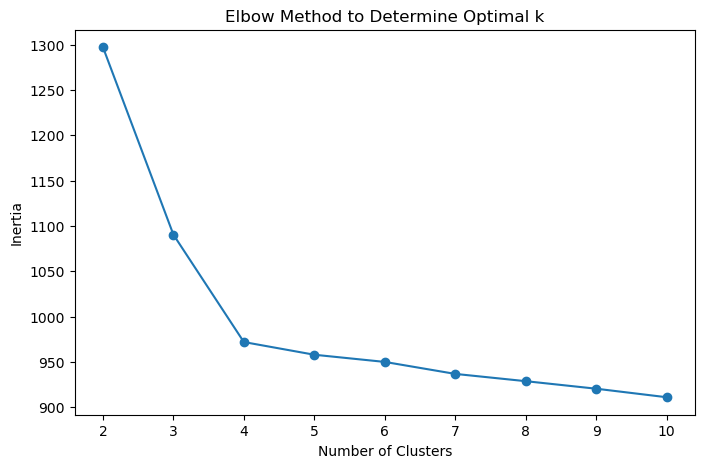

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
customers = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Customers.csv")
transactions = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Transactions.csv")

# Step 2: Merge datasets on 'CustomerID'
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

# Step 3: Preprocessing
# Fill missing numerical values with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with column mode
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 4: Feature selection
# Define features for clustering, including numerical and categorical
feature_candidates = ["Region", "SignupDate", "price","quality"]
available_features = [col for col in feature_candidates if col in data.columns]

if not available_features:
    raise ValueError("None of the required features are present in the dataset. Check column names.")

features = data[available_features]

# Step 5: Preprocess categorical and numerical data using a pipeline
# OneHotEncoder for categorical columns, StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), [col for col in features.columns if features[col].dtype in [np.float64, np.int64]]),
        ("cat", OneHotEncoder(drop="first"), [col for col in features.columns if features[col].dtype == "object"])
    ]
)

# Transform features
processed_features = preprocessor.fit_transform(features)

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Testing cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Step 7: Choose optimal number of clusters (e.g., based on the elbow plot)
optimal_k = 4  # Set this based on the elbow plot

# Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data["Cluster"] = kmeans.fit_predict(processed_features)

# Step 9: Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(processed_features, data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Step 10: Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(processed_features)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data["Cluster"], palette="Set2", s=100)
plt.title(f"Customer Segments Visualization (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 11: Save final results to CSV (optional)
data.to_csv(r"C:\Users\sachu\Downloads\Clustered_Customers.csv", index=False)


C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\clust

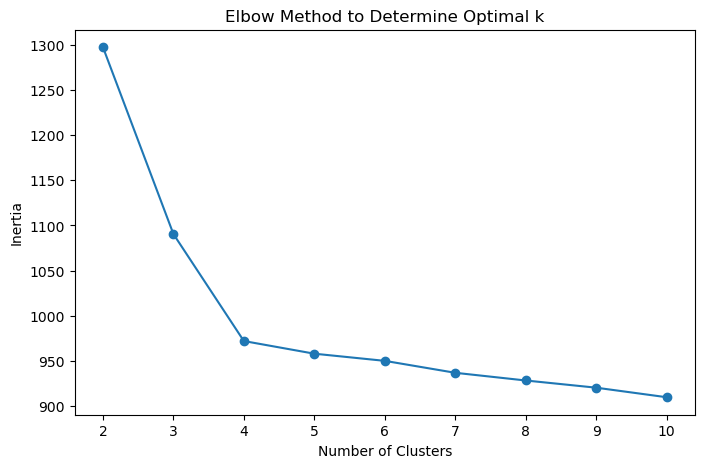

C:\Users\sachu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 1.93


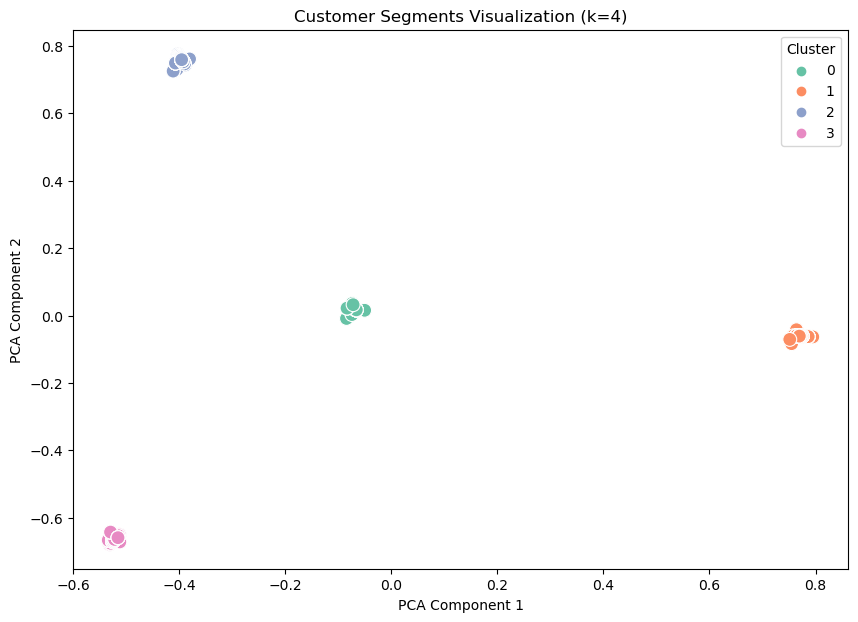

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
customers = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Customers.csv")
transactions = pd.read_csv(r"C:\Users\sachu\Downloads\OneDrive\Transactions.csv")

# Step 2: Merge datasets on 'CustomerID'
data = pd.merge(customers, transactions, on="CustomerID", how="inner")

# Step 3: Preprocessing
# Fill missing numerical values with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with column mode
categorical_cols = data.select_dtypes(exclude=[np.number]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 4: Feature selection
feature_candidates = ["Region", "SignupDate", "price","quality"]
available_features = [col for col in feature_candidates if col in data.columns]

if not available_features:
    raise ValueError("None of the required features are present in the dataset. Check column names.")

features = data[available_features]

# Step 5: Preprocess categorical and numerical data using a pipeline
# OneHotEncoder for categorical columns, StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), [col for col in features.columns if features[col].dtype in [np.float64, np.int64]]),
        ("cat", OneHotEncoder(drop="first"), [col for col in features.columns if features[col].dtype == "object"])
    ]
)

# Transform features
processed_features = preprocessor.fit_transform(features).toarray()  # Convert sparse matrix to dense array

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):  # Testing cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Step 7: Choose optimal number of clusters (e.g., based on the elbow plot)
optimal_k = 4  # Set this based on the elbow plot

# Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data["Cluster"] = kmeans.fit_predict(processed_features)

# Step 9: Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(processed_features, data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Step 10: Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(processed_features)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=data["Cluster"],
    palette="Set2",
    s=100
)
plt.title(f"Customer Segments Visualization (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 11: Save final results to CSV (optional)
data.to_csv(r"C:\Users\sachu\Downloads\Clustered_Customers.csv", index=False)
